In [67]:
'''
实验中会用到的数据集：USAir, NS, PB, Yeast, C.ele, Power, Router（先使用这7个如果不够的话再加新数据集）
dataset:Celegans.txt,vertices_num:296,edges_num:2359
dataset:NS.txt,vertices_num:1589,edges_num:2742
dataset:PB.txt,vertices_num:1222,edges_num:19021
dataset:Power.txt,vertices_num:4940,edges_num:6594
dataset:Router.txt,vertices_num:5021,edges_num:6258
dataset:USAir.txt,vertices_num:332,edges_num:2126
dataset:Yeast.txt,vertices_num:2374,edges_num:11693
'''
import os
file_dir = r"./network_dataset/"
def read_network_information(file):
    #读取进行来的数据要么是两列数据，要么是三列数据
    Network = []
    for line in open(file,'r'):
        Network.append([float(i) for i in line.split()])
    Network = np.array(Network)
    
    vertices_num = np.max(Network[:,:2])
    edges_num = len(Network)
    return vertices_num,edges_num

def read_all_dataset(file_dir):
    all_dataset = os.listdir(file_dir)
    #print(all_dataset)
    all_dataset_v_e_nums = []
    for i in all_dataset:
        temp_1,temp_2 = read_network_information(file_dir+i)
        print('dataset:{},vertices_num:{},edges_num:{}'.format(i,int(temp_1),temp_2))

In [68]:
read_all_dataset(file_dir)

dataset:Celegans.txt,vertices_num:296,edges_num:2359
dataset:NS.txt,vertices_num:1589,edges_num:2742
dataset:PB.txt,vertices_num:1222,edges_num:19021
dataset:Power.txt,vertices_num:4940,edges_num:6594
dataset:Router.txt,vertices_num:5021,edges_num:6258
dataset:USAir.txt,vertices_num:332,edges_num:2126
dataset:Yeast.txt,vertices_num:2374,edges_num:11693


In [1]:
'''
使用networkx库构建网络数据结构
'''
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

#这里的FILE_PATH用于存储所有需要用到的网络数据集
FILE_PATH = './network_dataset/jazz.txt'

def read_network_data(file_path,network_type):
    '''
    input: 数据集路径，输入网络的类型
    output: networkx下的network数据结构
    '''
    Network = []
    for line in open(file_path,'r'):
        Network.append([float(i) for i in line.split()])
    Network = np.array(Network)
    if network_type == 'UU':
        graph_network = nx.Graph()
        graph_network.add_nodes_from(list(range(1,np.max(Network)+1)))
        graph_network.add_edges_from(Network[:,:2])
        return graph_network,Network
    elif network_type == 'DU':
        graph_network = nx.DiGraph()
        graph_network.add_nodes_from(list(range(1,np.max(Network[:,:2])+1)))
        graph_network.add_weighted_edges_from(Network)
        return graph_network,Network
    elif network_type == 'UW':
        graph_network = nx.Graph()
        graph_network.add_nodes_from(list(range(1,np.max(Network[:,:2])+1)))
        graph_network.add_weighted_edges_from(Network)
        return graph_network,Network
    elif network_type == 'DW':
        graph_network = nx.DiGraph()
        graph_network.add_nodes_from(list(range(1,np.max(Network[:,:2])+1)))
        graph_network.add_weighted_edges_from(Network)
        return graph_network,Network
    else:
        print("WRONG NETWORK TYPE")

In [41]:
#对数据集进行一些划分
from sklearn.utils import shuffle
def divide_dataset(Network_data,training_rate):
    '''
    input: 网络连边数组，训练集比例
    output: 训练集与测试集
    '''
    Network_data = shuffle(Network_data)
    training_number = int(len(Network_data)*training_rate)
    training_edges = Network_data[:training_number]
    test_edges = Network_data[training_number:]
    return training_edges,test_edges

#构造训练集和测试集，正样本与负样本
def positive_negative_samples(network,training_rate):
    #获取节点数量
    dimension = np.max(network_edges[:,:2])
    #构造一个全连接的网络
    temp_graph = nx.complete_graph(range(1,dimension+1))
    temp_edges = np.array(temp_graph.edges)
    network_edges = np.array(network.edges)
    #寻找两个边集的差集，表示的是原本在网络中不存在的一些边，随机选取一些其中的边作为负样本放入后续的网络模型中进行训练
    No_exist_edges = np.setdiff1d(temp_edges,network_edges)
    No_exist_edges = shuffle(No_exist_edges)
    training_edges,testing_edges = divide_dataset(network_edges,training_rate)
    sample_num = len(training_edges)
    negative_samples = No_exist_edges[:sample_num]
    return training_edges,negative_samples,testing_edges
    
#提取子图节点
def h_hops_nodes_set(graph,center_nodes,hops):
    '''
    input: nx类图数据结构，中央节点两个，跳数
    output: 关于两个center nodes的h跳的子图
    '''
    graph_adj_matrix = nx.adjacency_matrix(graph)
    graph_adj_matrix_dense = graph_adj_matrix.todense()
    hop_adj_matrix = graph_adj_matrix_dense ** hops
    adj_node1 = np.array(hop_adj_matrix[center_nodes[0]-1]).reshape(-1)
    adj_node2 = np.array(hop_adj_matrix[center_nodes[1]-1]).reshape(-1)
    #print('center node 1 sets: {}'.format(adj_node1))
    #print('center node 2 sets: {}'.format(adj_node2))
    node_1_set = np.where(adj_node1 != 0)[0] + 1
    node_2_set = np.where(adj_node2 != 0)[0] + 1
    h_hops_center_nodes_set = np.intersect1d(node_1_set,node_2_set)
    #print("center nodes: ",center_nodes)
    #print("h_hop nodes set: ",h_hops_center_nodes_set)
    return graph.subgraph(h_hops_center_nodes_set)

In [37]:
graph_jazz,Network_jazz = read_network_data(FILE_PATH,'UU')

198


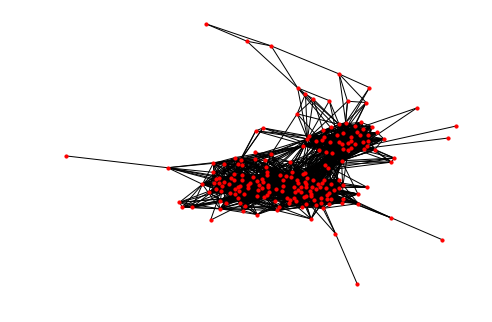

In [38]:
nx.draw(graph_jazz,node_size=10)
print(len(graph_jazz.nodes))

In [42]:
center_nodes_1 = Network_jazz[0]
subgraph_jazz = h_hops_nodes_set(graph_jazz,center_nodes_1,3)
print(center_nodes_1)
print(len(subgraph_jazz.nodes))

[1 8 1]
183


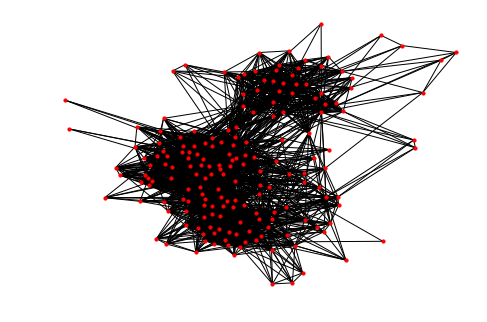

In [40]:
nx.draw(subgraph_jazz,node_size=10)

In [17]:
from node2vec import Node2Vec
def node2vec_function(graph,center_nodes):
    '''
    input: 提取出来的子图
    output: 子图中所有node的embedding以及子图得到的node2vec的模型
    '''
    #Node2Vec的一些参数具体解释：
    '''
    graph: nx.graph
    dimension: embedding dimensions
    walk_length: numbers of nodes in each walk
    num_walks: number of walks per node 
    还有一些可以参考官方文档
    '''
    node2vec = Node2Vec(graph,dimensions=32,walk_length=3,num_walks=20)
    node2vec_model = node2vec.fit(window=10,min_count=1,batch_words=4)
    EBEDDING_FILE_NAME = 'center_node_' + str(center_nodes[0]) + '_node_' + str(center_nodes[1]) + 'embedding.model'
    #是否保存词向量embedding的模型看情况
    #node2vec_model.wv.save_word2vec_format(EBEDDING_FILE_NAME)
    graph_nodes = np.array(graph.node)
    embedding_vectors = []
    for i in graph_nodes:
        embedding_vectors.append((i,node2vec_model[str(i)]))
    return embedding_vectors,node2vec_model

In [18]:
embedding_vectors_1,model_1 = node2vec_function(subgraph_jazz,center_nodes_1)

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 20/20 [00:00<00:00, 99.41it/s]
D:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


In [32]:
print(len(subgraph_jazz.nodes))
print(len(embedding_vectors_1))

192
105


In [21]:
print(subgraph_jazz.nodes)

[1, 2, 3, 4, 5, 6, 7, 10, 11, 15, 17, 19, 20, 23, 24, 25, 26, 27, 29, 30, 31, 32, 35, 39, 41, 42, 43, 48, 49, 51, 52, 53, 55, 56, 57, 58, 59, 61, 62, 64, 67, 68, 69, 75, 77, 79, 81, 82, 84, 87, 90, 91, 93, 94, 95, 97, 99, 100, 102, 106, 107, 108, 109, 111, 112, 113, 114, 119, 120, 123, 124, 125, 127, 128, 129, 130, 131, 132, 133, 140, 144, 146, 148, 149, 152, 153, 154, 155, 156, 158, 160, 164, 166, 167, 172, 174, 179, 182, 184, 185, 186, 192, 196, 197, 198]


In [8]:
def cos_dist(vec1,vec2):
    """
    :param vec1: 向量1
    :param vec2: 向量2
    :return: 返回两个向量的余弦相似度
    """
    dist1=float(np.dot(vec1,vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2)))
    return dist1
#节点embedding向量之间计算节点相似度
def similarity_nodes_embedding(center_nodes,node2vec_model,max_size):
    #首先获取两个中心节点的embedding向量
    node_1_embedding = node2vec_model[str(center_nodes[0])]
    node_2_embedding = node2vec_model[str(center_nodes[1])]
    #计算其他所有节点的到这两个节点embedding向量的相似度
    index_nodes = np.array(node2vec_model.wv.index2word)
    similarity_node_1_dist = []
    similarity_node_2_dist = []
    for i in node2vec_model.wv.index2word:
        if i != str(center_nodes[0]) and i !=str(center_nodes[1]):
            similarity_node_1_dist.append(cos_dist(node_1_embedding,node2vec_model[i]))
            similarity_node_2_dist.append(cos_dist(node_2_embedding,node2vec_model[i]))
    similarity_dist = np.array(similarity_node_1_dist + similarity_node_2_dist)
    matrix_sort = list(zip(similarity_dist,index))
    #对于所有的node做一个排序
    matrix_sort.sort()
    if len(matrix_sort) > max_size:   
        return matrix_sort[0:max_size]
    else:
        return matrix_sort  